# EDA
**At the end of this notebook, you can find assumptions and changes to the DB**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = 'ad_clicks_fix_100k.csv'

In [4]:
df = pd.read_csv(filename)

In [5]:
df.head(25)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,date,weekday,hour_of_day
0,6.450000e+18,0,14102806,1005,0,Other_Site_Ids,Other_Site_Domains,f028772b,ecad2386,7801e8d9,...,320,50,2227,0,935,-1,48,28/10/2014 06:00,Tuesday,6
1,1.340000e+19,0,14102307,1002,0,85f751fd,c4e18dd6,50e219e0,Other_App_Ids,7801e8d9,...,320,50,2495,2,167,-1,23,23/10/2014 07:00,Thursday,7
2,1.050000e+19,0,14102310,1005,0,Other_Site_Ids,Other_Site_Domains,f028772b,ecad2386,7801e8d9,...,300,250,2523,3,39,-1,221,23/10/2014 10:00,Thursday,10
3,8.830000e+18,0,14102307,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,23/10/2014 07:00,Thursday,7
4,1.040000e+19,0,14102811,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,320,50,2676,0,35,100176,221,28/10/2014 11:00,Tuesday,11
5,8.980000e+18,1,14102914,1005,1,Other_Site_Ids,Other_Site_Domains,f028772b,ecad2386,7801e8d9,...,320,50,761,3,175,100075,23,29/10/2014 14:00,Wednesday,14
6,1.270000e+19,0,14102719,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,...,320,50,2424,1,161,100189,71,27/10/2014 19:00,Monday,19
7,1.550000e+19,0,14102912,1002,0,Other_Site_Ids,16a36ef3,50e219e0,ecad2386,7801e8d9,...,320,50,1752,3,297,100081,82,29/10/2014 12:00,Wednesday,12
8,3.110000e+18,0,14102820,1005,0,85f751fd,c4e18dd6,50e219e0,Other_App_Ids,2347f47a,...,320,50,2665,0,35,100034,221,28/10/2014 20:00,Tuesday,20
9,5.830000e+18,1,14103015,1005,0,85f751fd,c4e18dd6,50e219e0,Other_App_Ids,2347f47a,...,320,50,2283,0,163,-1,95,30/10/2014 15:00,Thursday,15


In [6]:
# Drop column hour because redundant to column hour_of_day
df.drop(['hour'], axis=1, inplace=True)

In [7]:
type(df)

pandas.core.frame.DataFrame

**Step 2: Initial Data Inspection**

Description: Quickly assess the structure, size, and general content of the data. Look at the first few rows, data types, and summary statistics.

Key: Identifying the number of features, rows, checking for obvious issues like missing values or incorrect data types.

What command would you use to display the data types of each column in the dataset?

In [8]:
df.shape

(100000, 26)

In [9]:
df.columns

Index(['id', 'click', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'date', 'weekday',
       'hour_of_day'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  float64
 1   click             100000 non-null  int64  
 2   C1                100000 non-null  int64  
 3   banner_pos        100000 non-null  int64  
 4   site_id           100000 non-null  object 
 5   site_domain       100000 non-null  object 
 6   site_category     100000 non-null  object 
 7   app_id            100000 non-null  object 
 8   app_domain        100000 non-null  object 
 9   app_category      100000 non-null  object 
 10  device_id         100000 non-null  object 
 11  device_ip         100000 non-null  object 
 12  device_model      100000 non-null  object 
 13  device_type       100000 non-null  int64  
 14  device_conn_type  100000 non-null  int64  
 15  C14               100000 non-null  int64  
 16  C15               100

In [11]:
df.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,9.236757e+18,0.170310,1004.969200,0.288640,1.015190,0.332260,18845.372740,318.852520,60.216420,2113.509950,1.432660,227.585890,53116.13077,83.498460,11.271340
std,5.332948e+18,0.375907,1.090561,0.503994,0.524959,0.853341,4963.742483,21.153502,47.740899,609.604505,1.325988,351.782614,49963.28370,70.365391,5.968664
min,1.460370e+14,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.00000,1.000000,0.000000
25%,4.620000e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.00000,23.000000,6.000000
50%,9.270000e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.00000,61.000000,11.000000
75%,1.390000e+19,0.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100086.00000,108.000000,16.000000
max,1.840000e+19,1.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.00000,255.000000,23.000000


In [12]:
for col in df.select_dtypes(include=['float']).columns:
    print(col)

id


In [13]:
for col in df.select_dtypes(include=['int']).columns:
    print(col)   

click
C1
banner_pos
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21
hour_of_day


In [14]:
for col in df.select_dtypes(include=['object']).columns:
    print(col)

site_id
site_domain
site_category
app_id
app_domain
app_category
device_id
device_ip
device_model
date
weekday


In [15]:
df['click'].value_counts()

0    82969
1    17031
Name: click, dtype: int64

In [16]:
df['click'].astype(bool).value_counts()

False    82969
True     17031
Name: click, dtype: int64

In [17]:
df['C1'].value_counts().sort_index()

1001       19
1002     5426
1005    91963
1007       80
1008       15
1010     2205
1012      292
Name: C1, dtype: int64

In [18]:
df['banner_pos'].value_counts().sort_index()

0    71908
1    27915
2       34
3        6
4       22
5       15
7      100
Name: banner_pos, dtype: int64

In [19]:
df['site_id'].value_counts()

85f751fd          36040
Other_Site_Ids    29783
1fbe01fe          16120
e151e245           6543
d9750ee7           2367
5b08c53b           2297
856e6d3f           1966
5b4d2eda           1933
a7853007           1161
b7e9786d            951
5ee41ff2            839
Name: site_id, dtype: int64

In [20]:
df['site_domain'].value_counts()

c4e18dd6              37353
Other_Site_Domains    25713
f3845767              16120
7e091613               8279
7687a86e               3254
98572c79               2453
16a36ef3               2155
58a89a43               1966
b12b9f85                961
9d54950b                899
17d996e6                847
Name: site_domain, dtype: int64

In [21]:
df['site_category'].value_counts()

50e219e0    40828
f028772b    31311
28905ebd    18297
3e814130     7581
f66779e6      575
75fa27f6      415
335d28a8      337
76b2941d      276
c0dd3be3      126
dedf689d       61
72722551       58
70fb0e29       52
0569f928       43
8fd0aea4       20
a818d37a        7
42a36e14        5
e787de0e        5
bcf865d9        2
5378d028        1
Name: site_category, dtype: int64

In [22]:
df['app_id'].value_counts()

ecad2386         63960
Other_App_Ids    19792
92f5800b          3850
e2fcccd2          2878
9c13b419          1895
febd1138          1879
7358e05e          1543
a5184c22          1217
d36838b1          1104
685d1c4c           967
54c5d545           915
Name: app_id, dtype: int64

In [23]:
df['app_domain'].value_counts()

7801e8d9             67320
2347f47a             12895
ae637522              4644
Other_App_Domains     3260
5c5a694b              2879
82e27996              1879
d9b5648e              1775
0e8616ad              1648
b9528b13              1613
b8d325c3              1335
df32afa9               752
Name: app_domain, dtype: int64

In [24]:
df['C15'].value_counts().sort_index()

120         5
216       753
300      5809
320     93236
480         8
728       175
768         7
1024        7
Name: C15, dtype: int64

In [25]:
df['C16'].value_counts().sort_index()

20          5
36        753
50      94277
90        175
250      4517
320         8
480       251
768         7
1024        7
Name: C16, dtype: int64

In [26]:
df['C17'].nunique()

399

In [27]:
df['C18'].value_counts().sort_index()

0    41872
1     6756
2    17606
3    33766
Name: C18, dtype: int64

In [28]:
df['C19'].value_counts().sort_index()

33       1149
34        675
35      30060
38        434
39      21727
        ...  
1583        4
1711      238
1831       59
1835       37
1839       34
Name: C19, Length: 65, dtype: int64

In [29]:
df['C20'].value_counts().sort_index()

-1         46943
 100000      341
 100001       20
 100002       13
 100003      263
           ...  
 100229        4
 100233      283
 100241       53
 100244       10
 100248       23
Name: C20, Length: 157, dtype: int64

In [30]:
df['C21'].value_counts().sort_index()

1          6
13       990
15      1898
16       838
17       405
20        23
23     21915
32      4383
33      3715
35       108
42      2547
43      1433
46       559
48      5390
51      2195
52      3050
61      5068
68       778
69       443
70       355
71      5222
76       333
79     11312
82       175
90       294
91       387
93        27
94        36
95       730
100      150
101      174
102       24
104       20
108      123
110      291
111      343
112      187
116       30
117     1034
126       18
156      867
157     4540
159      806
163       14
171      284
177       13
178      141
182       99
194       33
195       14
204      237
212     1591
219        5
221    12626
229      985
246      496
251       46
253      179
255       15
Name: C21, dtype: int64

In [31]:
df['weekday'].value_counts()

Tuesday      23309
Wednesday    22617
Thursday     19975
Sunday        9565
Saturday      8388
Friday        8272
Monday        7874
Name: weekday, dtype: int64

In [32]:
df['hour_of_day'].value_counts().sort_index()

0     2161
1     2337
2     3080
3     3405
4     4798
5     4911
6     4435
7     4642
8     5200
9     5680
10    5337
11    4972
12    5407
13    5826
14    5418
15    5164
16    4970
17    5076
18    4304
19    3287
20    2753
21    2455
22    2283
23    2099
Name: hour_of_day, dtype: int64

**Step 3: Data Cleaning**

Description: Address missing values, duplicate data, and irrelevant data. This step ensures the quality and integrity of data.

Key: Techniques for handling missing data (imputation, deletion), identifying and removing duplicates, dropping irrelevant columns.

In [33]:
# Check for duplicates and remove them

duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

df = df.drop_duplicates()

Number of duplicate rows: 182


In [34]:
# Check for missing values
missing_values = df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

# Check if there are any missing values in the entire dataset
any_missing = df.isnull().any().any()
print("Does the dataset have any missing values?", any_missing)

Missing values in each column:
id                  0
click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
date                0
weekday             0
hour_of_day         0
dtype: int64
Does the dataset have any missing values? False


In [35]:
# Removes hour from date to be able to compare days since the hour in date column is redundant to hour_of_day
df['date'] = df['date'].apply(lambda x: x.split()[0])

In [36]:
# Change Device types to Assumptions made by us according to most used device_types (https://study.com/academy/lesson/mobile-devices-examples-impact-trends.html)
df['device_type'].replace({
    0: 'Laptop',
    1: 'Smartphone',
    4: 'Tablet',
    5: 'Computer'
}, inplace=True)

**Step 4: Data Formatting and Type Conversion**

Description: Standardize the format of data and convert data types where necessary (like converting strings to datetime objects).

Key: Consistency in data (e.g., date formats), converting categorical variables into numerical formats for analysis.

Question: How would you convert a column 'Date' from string to a datetime object?

In [37]:
#check for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99818 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                99818 non-null  float64
 1   click             99818 non-null  int64  
 2   C1                99818 non-null  int64  
 3   banner_pos        99818 non-null  int64  
 4   site_id           99818 non-null  object 
 5   site_domain       99818 non-null  object 
 6   site_category     99818 non-null  object 
 7   app_id            99818 non-null  object 
 8   app_domain        99818 non-null  object 
 9   app_category      99818 non-null  object 
 10  device_id         99818 non-null  object 
 11  device_ip         99818 non-null  object 
 12  device_model      99818 non-null  object 
 13  device_type       99818 non-null  object 
 14  device_conn_type  99818 non-null  int64  
 15  C14               99818 non-null  int64  
 16  C15               99818 non-null  int64 

In [38]:
#converting data types

#convert id column from float to int
#df["id"] = df["id"].astype(int)

#convert columns to a categorical type
df["C1"] = df["C1"].astype("category")
df["banner_pos"] = df["banner_pos"].astype("category")
df["site_id"] = df["site_id"].astype("category")
df["site_category"] = df["site_category"].astype("category")
df["site_domain"] = df["site_domain"].astype("category")
df["app_domain"] = df["app_domain"].astype("category")
df["app_id"] = df["app_id"].astype("category")
df["app_category"] = df["app_category"].astype("category")
df["device_model"] = df["device_model"].astype("category")
df["device_ip"] = df["device_ip"].astype("category")
df["device_id"] = df["device_id"].astype("category")
df["device_type"] = df["device_type"].astype("category")
df["device_conn_type"] = df["device_conn_type"].astype("category")
df["C14"] = df["C14"].astype("category")
df["C15"] = df["C15"].astype("category")
df["C16"] = df["C16"].astype("category")
df["C17"] = df["C17"].astype("category")
df["C18"] = df["C18"].astype("category")
df["C19"] = df["C19"].astype("category")
df["C20"] = df["C20"].astype("category")
df["C21"] = df["C21"].astype("category")
df["weekday"] = df["weekday"].astype("category")
df["hour_of_day"] = df["hour_of_day"].astype("category")


#convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')


#We will create another column named Click_Boolean. 
#The reason behind this is that we want to keep the Click column with 0 and 1, 
#since its easier to peform computation on it.
df["Click_Boolean"] = df["click"].astype(bool)
df.head()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C16,C17,C18,C19,C20,C21,date,weekday,hour_of_day,Click_Boolean
0,6.450000e+18,0,1005,0,Other_Site_Ids,Other_Site_Domains,f028772b,ecad2386,7801e8d9,07d7df22,...,50,2227,0,935,-1,48,2014-10-28,Tuesday,6,False
1,1.340000e+19,0,1002,0,85f751fd,c4e18dd6,50e219e0,Other_App_Ids,7801e8d9,07d7df22,...,50,2495,2,167,-1,23,2014-10-23,Thursday,7,False
2,1.050000e+19,0,1005,0,Other_Site_Ids,Other_Site_Domains,f028772b,ecad2386,7801e8d9,07d7df22,...,250,2523,3,39,-1,221,2014-10-23,Thursday,10,False
3,8.830000e+18,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,50,1722,0,35,-1,79,2014-10-23,Thursday,7,False
4,1.040000e+19,0,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,...,50,2676,0,35,100176,221,2014-10-28,Tuesday,11,False


**Step 5: Univariate Analysis - analyze variables individually**

Description: Analyze each variable individually to summarize and find patterns in the data. This includes looking at distributions and identifying anomalies.

Key: Use of descriptive statistics, histograms, box plots, and frequency distribution tables.

Question: Can you create a histogram to visualize the distribution of the 'age' column?

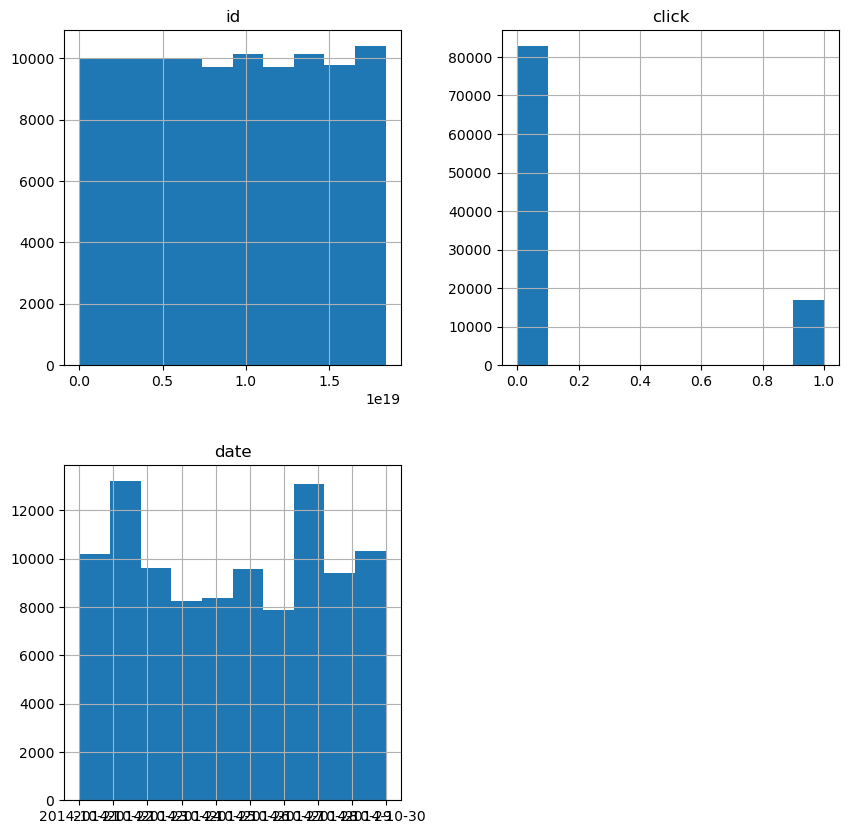

In [43]:
# For numerical variables
df.hist(figsize=(10, 10), bins=10)
plt.show()

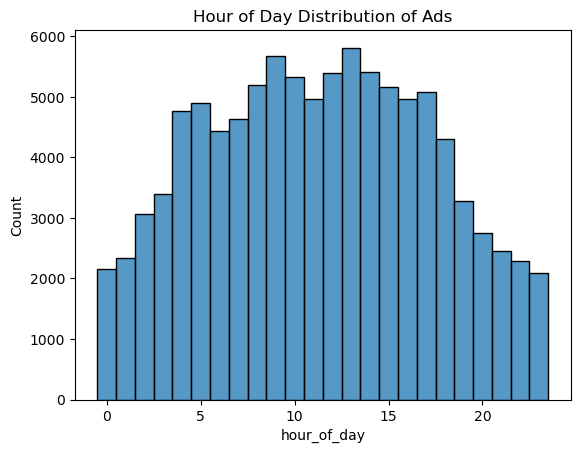

In [44]:
# Histogram of hour of day
sns.histplot(df['hour_of_day'])
plt.title('Hour of Day Distribution of Ads')
plt.show()

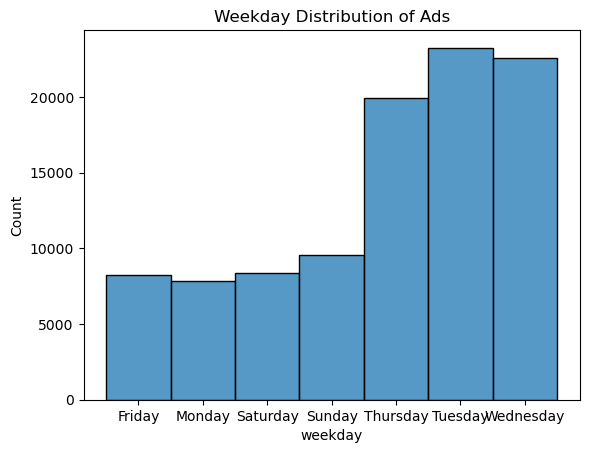

In [45]:
# Histogram of weekday
sns.histplot(df['weekday'])
plt.title('Weekday Distribution of Ads')
plt.show()

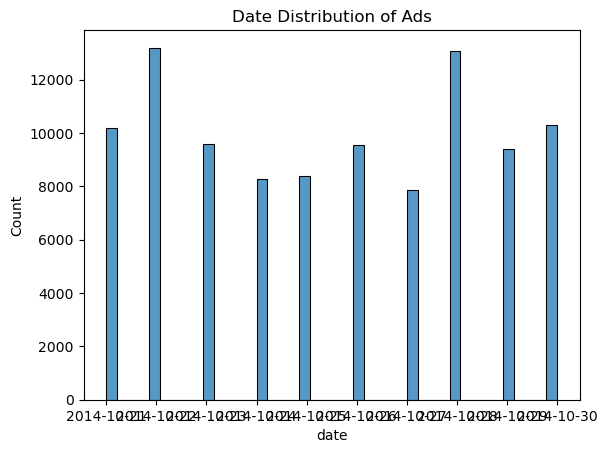

In [46]:
# Histogram of date
sns.histplot(df['date'])
plt.title('Date Distribution of Ads')
plt.show()

In [41]:
df.columns

Index(['id', 'click', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'date', 'weekday',
       'hour_of_day', 'Click_Boolean'],
      dtype='object')

In [42]:
column_numerical_list = df.select_dtypes(include=[int, float]).columns
column_numerical_list

Index(['id', 'click'], dtype='object')

In [43]:
column_categorical_list = df.select_dtypes(include=['category', bool]).columns
column_categorical_list

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'weekday', 'hour_of_day', 'Click_Boolean'],
      dtype='object')

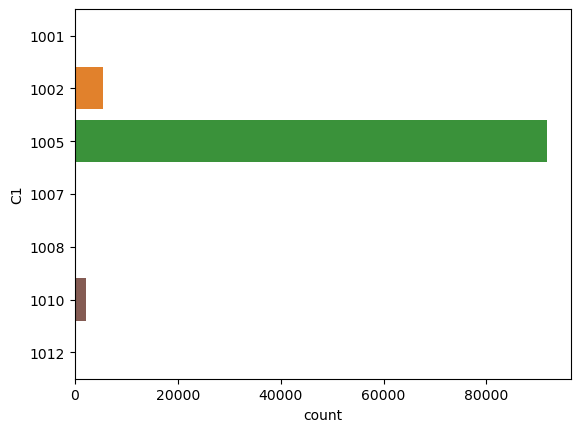

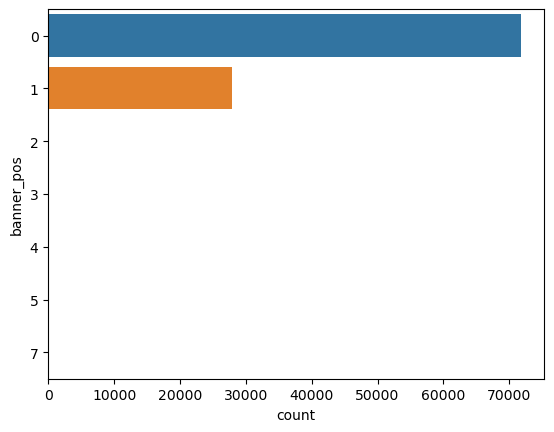

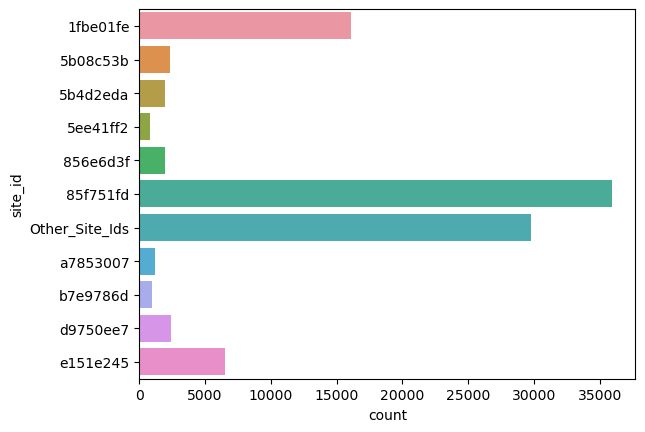

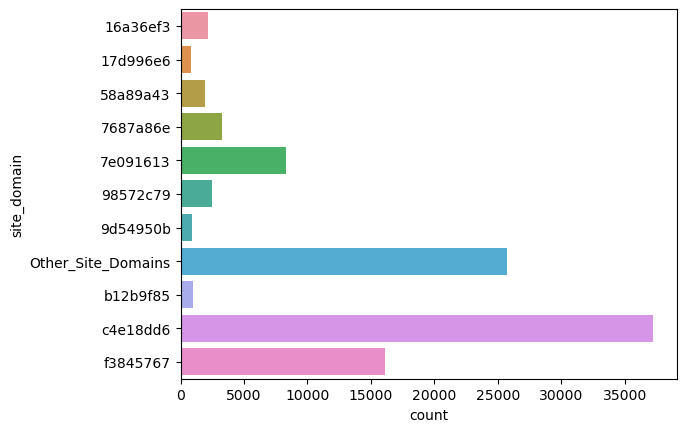

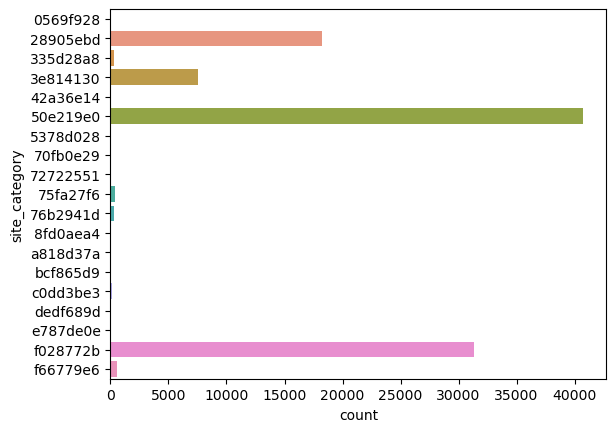

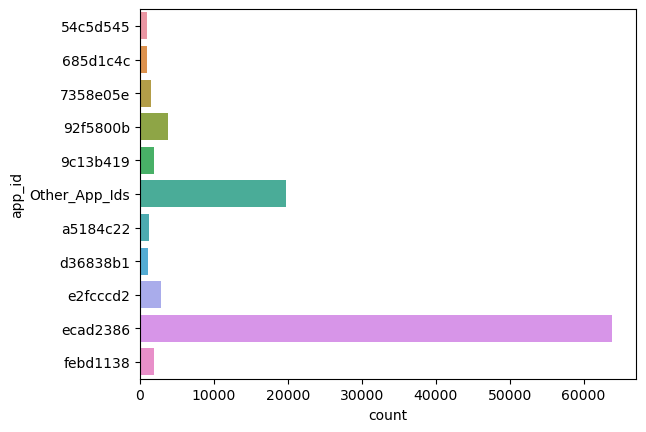

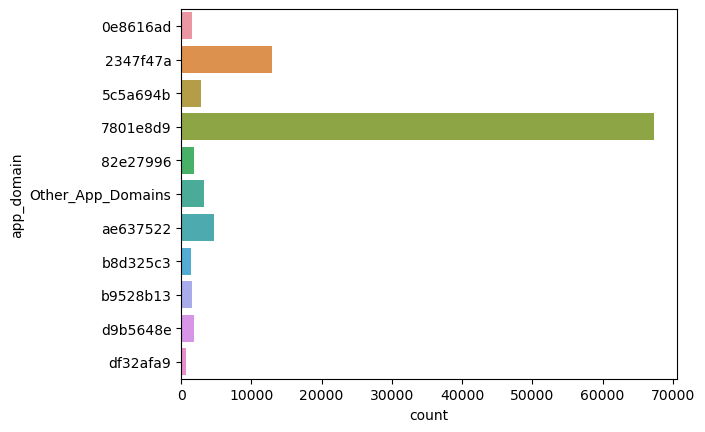

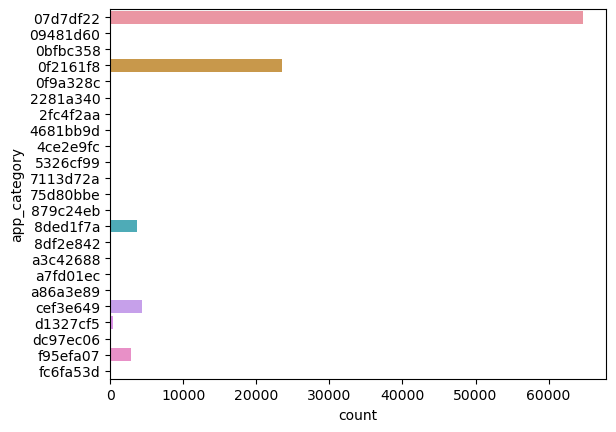

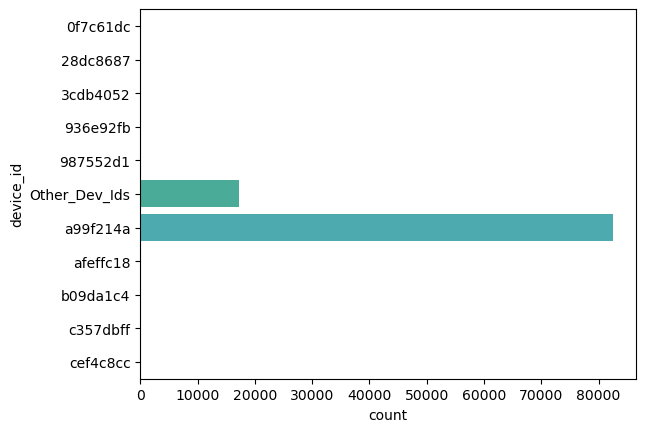

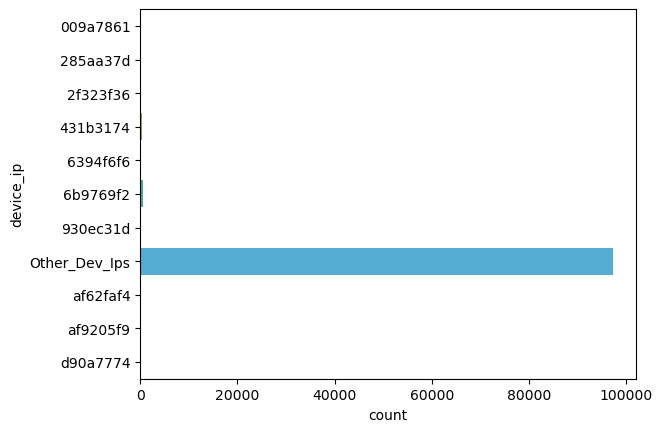

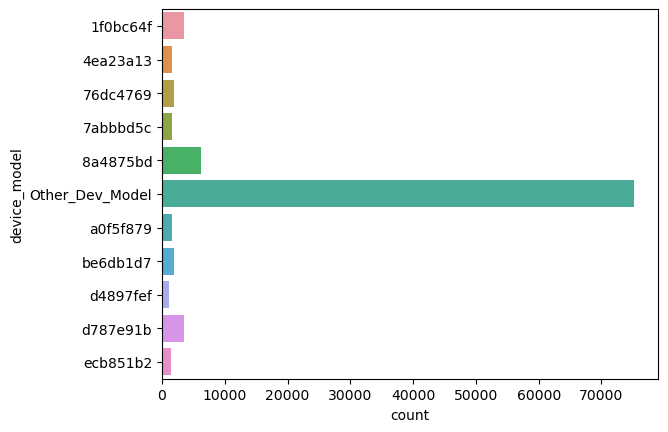

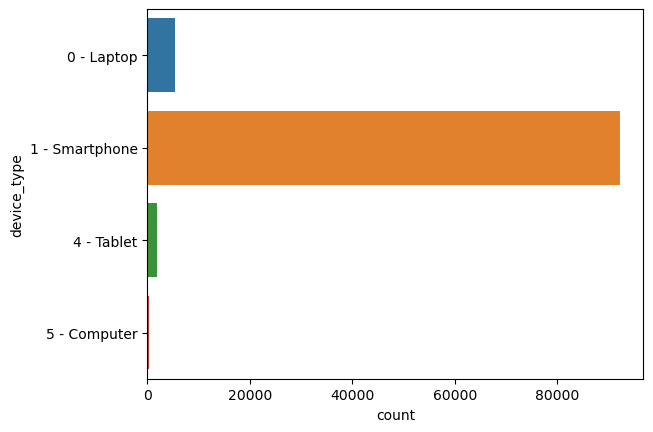

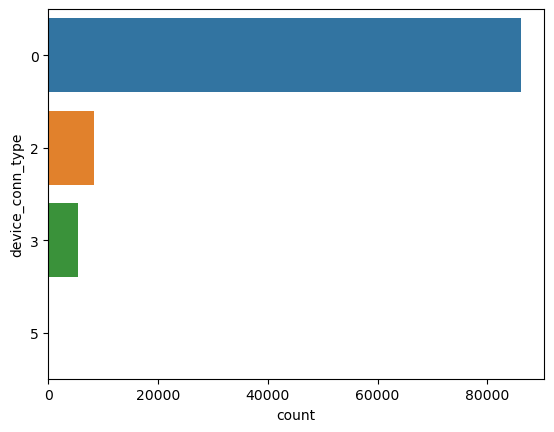

KeyboardInterrupt: 

In [44]:
# For categorical variables
for col in column_categorical_list:
    sns.countplot(y=col, data=df)
    plt.show()

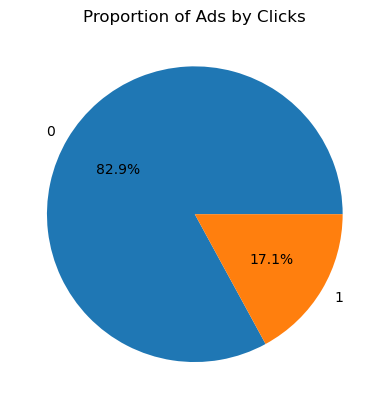

In [45]:
# Proportion of passengers by class
clicks_counts = df['click'].value_counts()

# Plot pie chart
plt.pie(clicks_counts, labels=clicks_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Ads by Clicks')
plt.show()

**Step 6: Bivariate Analysis - explore the relationships between variables**

Description: Explore the relationship between two variables to find correlations, trends, and patterns.

Key: Scatter plots, correlation coefficients, cross-tabulations, and exploring relationships between features.

Question: How would you investigate the relationship between 'adult_male' and 'survived'?

C:\Users\user\AppData\Local\Temp\ipykernel_39744\3507258701.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr() #Pearson’s linear correlation coefficient


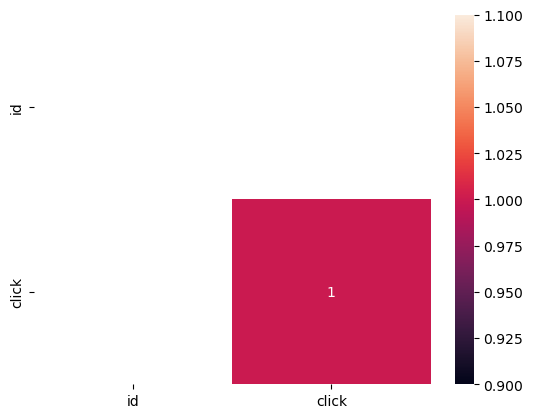

In [46]:
# Correlation matrix for numerical variables
new_df = df.drop('Click_Boolean', axis=1)
correlation_matrix = new_df.corr() #Pearson’s linear correlation coefficient
sns.heatmap(correlation_matrix, annot=True)
plt.show()

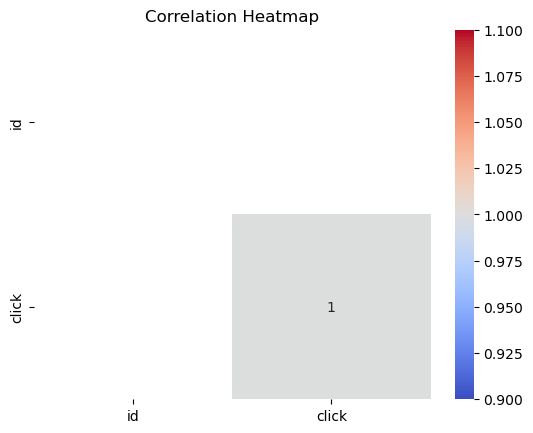

In [47]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

**Numerical vs Numerical**.

As we only have two numerical variables (click and id), numerical vs numerical analysis will not be very insightful.

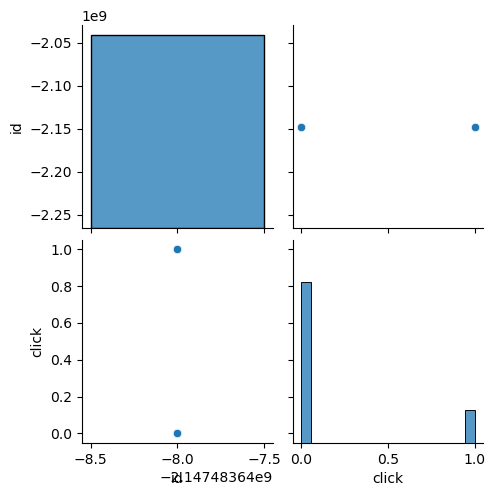

In [48]:
# Pairwise relationships in a dataset
sns.pairplot(df[column_numerical_list])
plt.show()

**Categorical vs Numerical**.

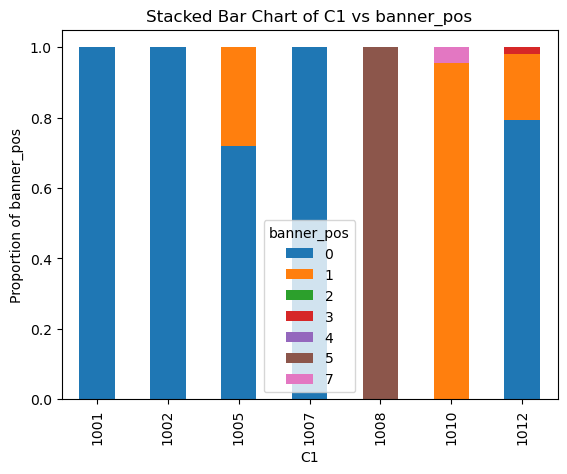

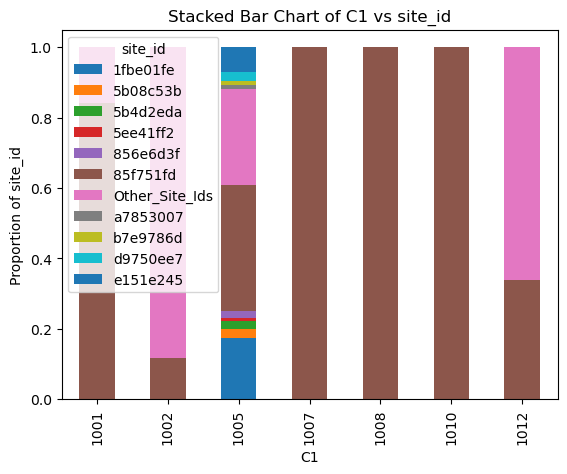

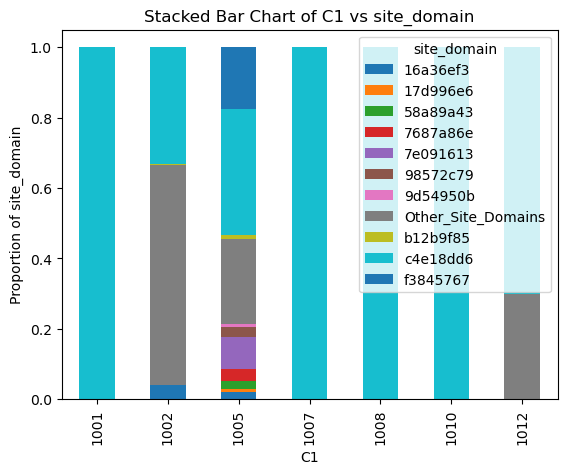

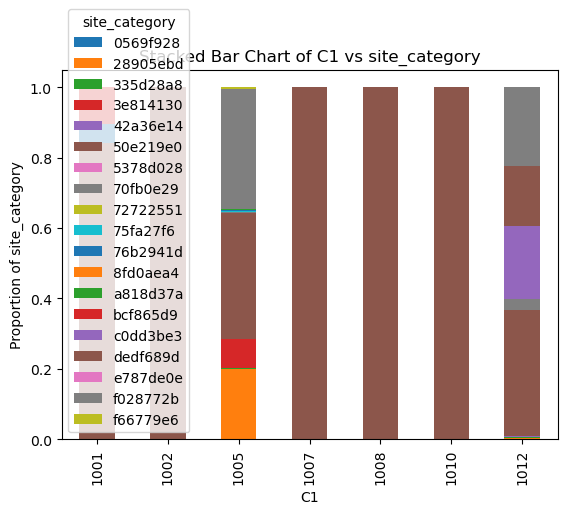

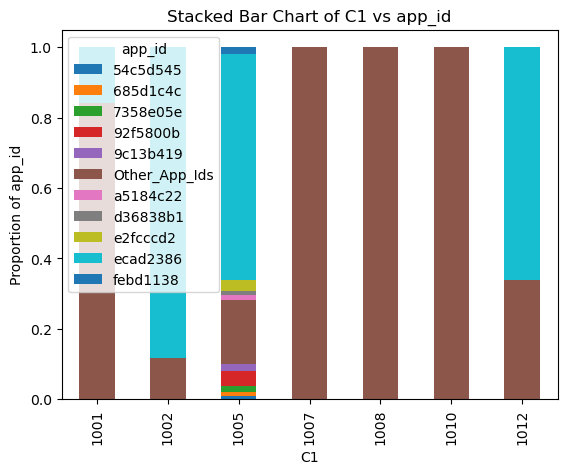

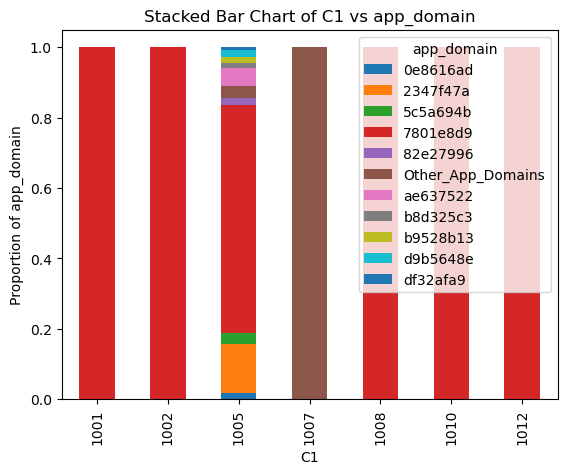

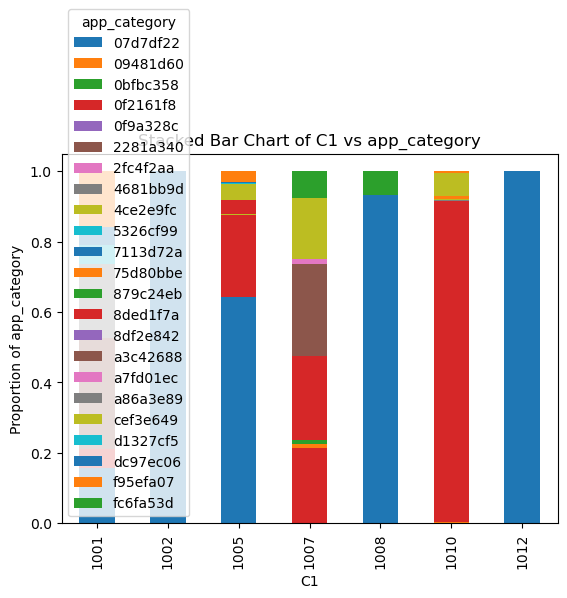

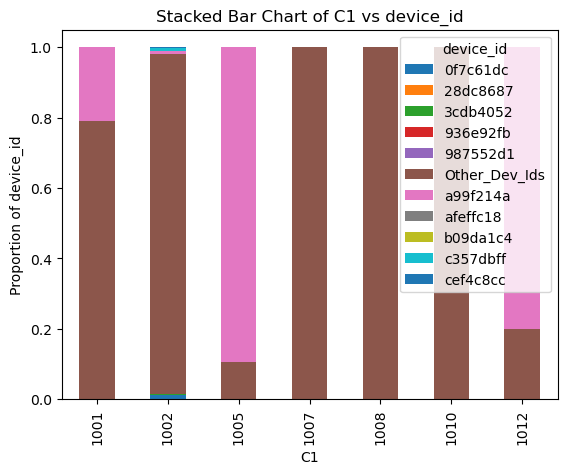

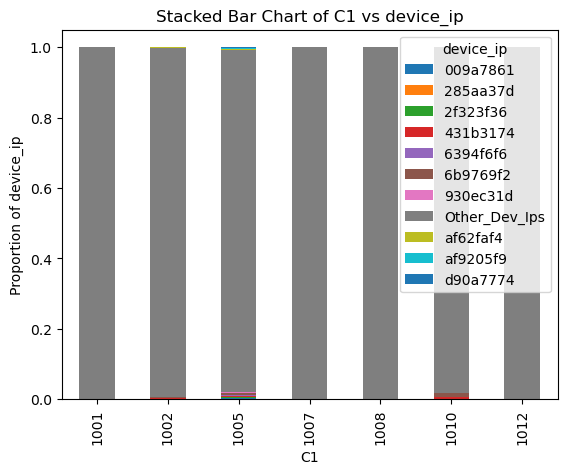

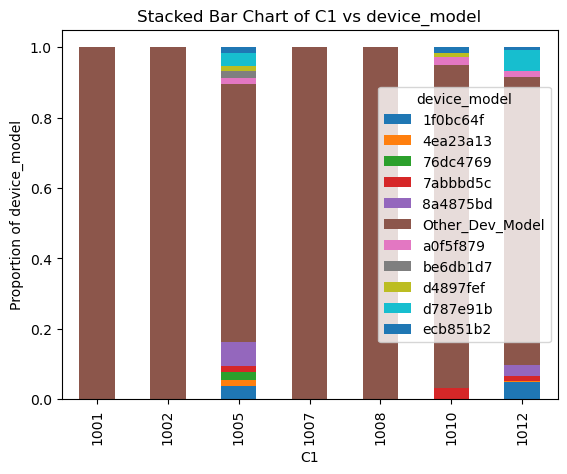

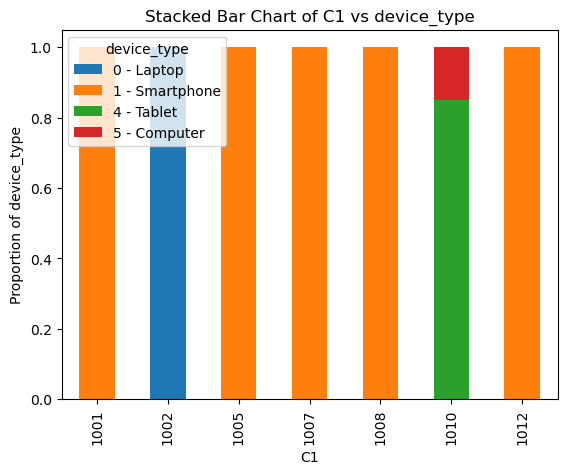

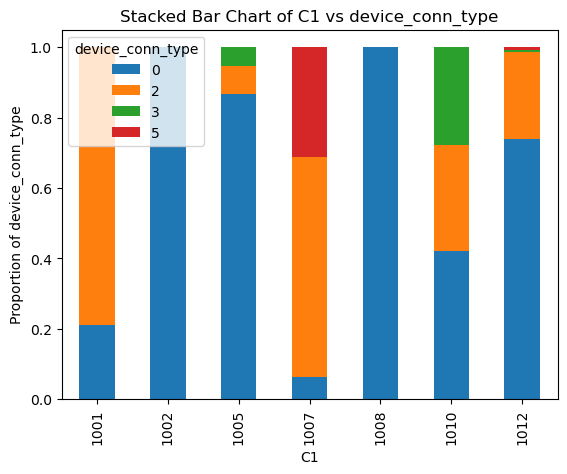

KeyboardInterrupt: 

In [49]:
for col in column_categorical_list:
    for col2 in column_categorical_list:
        if col != col2:  # Avoid self-comparison
            ct = pd.crosstab(df[col], df[col2], normalize='index')
            ct.plot(kind='bar', stacked=True)
            plt.title(f'Stacked Bar Chart of {col} vs {col2}')
            plt.xlabel(col)
            plt.ylabel(f'Proportion of {col2}')
            plt.show()

In [50]:
df.groupby(['device_type', 'app_id']).size()

device_type     app_id       
0 - Laptop      54c5d545             0
                685d1c4c             0
                7358e05e             0
                92f5800b             0
                9c13b419             0
                Other_App_Ids      641
                a5184c22             0
                d36838b1             0
                e2fcccd2             0
                ecad2386          4782
                febd1138             0
1 - Smartphone  54c5d545           915
                685d1c4c           964
                7358e05e          1541
                92f5800b          3831
                9c13b419          1892
                Other_App_Ids    16908
                a5184c22          1213
                d36838b1          1069
                e2fcccd2          2877
                ecad2386         59120
                febd1138          1865
4 - Tablet      54c5d545             0
                685d1c4c             0
                7358e05e          

In [51]:
device_app_counts = df.groupby(['device_type', 'app_id']).size().reset_index(name='counts')

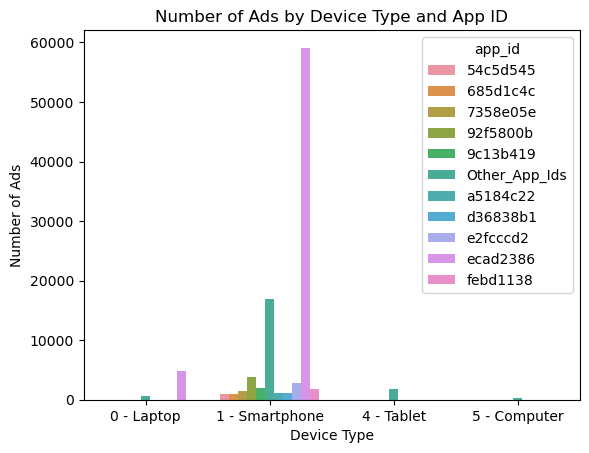

In [52]:
# Plot bar chart
sns.barplot(x='device_type', y='counts', hue='app_id', data=device_app_counts)
plt.title('Number of Ads by Device Type and App ID')
plt.xlabel('Device Type')
plt.ylabel('Number of Ads')
plt.show()

In [53]:
device_app_counts.pivot(index='device_type', columns='app_id', values='counts')


app_id,54c5d545,685d1c4c,7358e05e,92f5800b,9c13b419,Other_App_Ids,a5184c22,d36838b1,e2fcccd2,ecad2386,febd1138
device_type,,,,,,,,,,,
0 - Laptop,0,0,0,0,0,641,0,0,0,4782,0
1 - Smartphone,915,964,1541,3831,1892,16908,1213,1069,2877,59120,1865
4 - Tablet,0,0,0,0,0,1871,0,0,0,0,0
5 - Computer,0,0,0,0,0,328,0,0,0,1,0


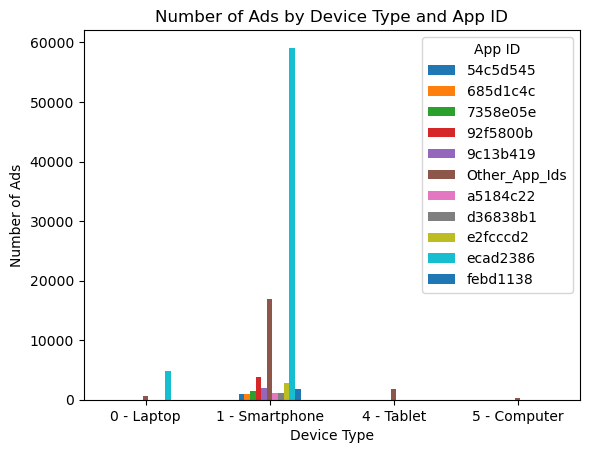

In [54]:
# Pivot table for stacked bar chart
device_app_pivot = device_app_counts.pivot(index='device_type', columns='app_id', values='counts')

# Plot stacked bar chart
device_app_pivot.plot(kind='bar', stacked=False)
plt.title('Number of Ads by Device Type and App ID')
plt.xlabel('Device Type')
plt.ylabel('Number of Ads')
plt.xticks(rotation=0)
plt.legend(title='App ID')
plt.show()

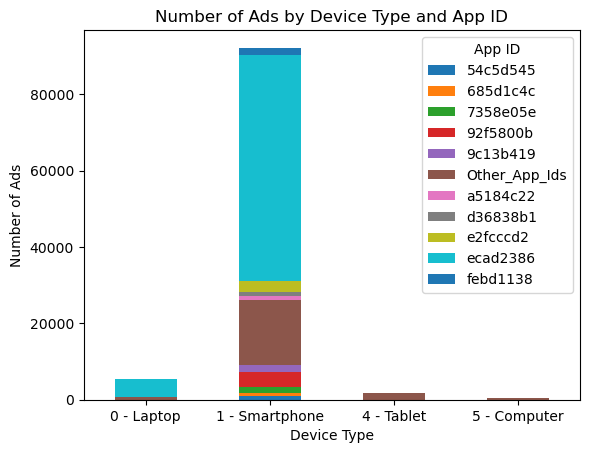

In [55]:
# Plot stacked bar chart
device_app_pivot.plot(kind='bar', stacked=True)
plt.title('Number of Ads by Device Type and App ID')
plt.xlabel('Device Type')
plt.ylabel('Number of Ads')
plt.xticks(rotation=0)
plt.legend(title='App ID')
plt.show()

**Step 7: Identifying and Handling Outliers**

Description: Detect and address outliers in the data that can skew analysis.




Regarding the boxplots and violinplot to find outliers: we don't have any variables on which
it makes sense to check if there are outliers. All data is anonymized, meaning it is not possible to interpret which data points can be regarded as a outliers.

**Step 8: Feature Engineering (if necessary)**

Description: Create new features or modify existing ones to improve the model's performance.

Key: Techniques like binning, creating interaction features, encoding categorical variables, feature scaling.

Question: How would you create a new feature that categorizes 'hour_of_day' into 'time_of_day'?

In [ ]:
# Bins for categorizing hours of the day
hour_bins = [0, 6, 12, 18, 23]

# Labels for each time period
hour_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Categorizing 'hour_of_day' into time periods
df['time_of_day'] = pd.cut(df['hour_of_day'], bins=hour_bins, labels=hour_labels, right=False, include_lowest=True)
df.head()

In [ ]:
time_of_day_click = df.groupby('time_of_day')['click'].mean()
time_of_day_click.plot(kind='bar')
plt.title('Rate of clicks by time of day')
plt.xlabel('Time of Day')
plt.ylabel('Click Rate')
plt.show()

**From now on, assumptions on data with no meaning and editing of the database**

In [39]:
#now i will replace the alphanumeric codes of the APP_ID into real app names, based on assumptions 
replace_values = {
    'ecad2386': 'Facebook',
    '92f5800b': 'TikTok',
    'e2fcccd2': 'Instagram',
    '9c13b419': 'Snapchat',
    'febd1138': 'Telegram',
    '7358e05e': 'Spotify',
    'a5184c22': 'Subway Surfers',
    'd36838b1': 'Stumble Guys',
    '685d1c4c': 'CapCut',
    '54c5d545': 'Other_App_Ids'
}

df['app_id'] = df['app_id'].replace(replace_values)


#df.head()

In [40]:
#now i will replace the names of device_type into easier names
replace_values_2 = {
    '1 - Smartphone': 'Smartphone',
    '0 - Laptop': 'Laptop',
    '4 - Tablet': 'Tablet',
    '5 - Computer': 'Computer'
}

df['device_type'] = df['device_type'].replace(replace_values_2)

**now I assume that all C1, C15, C16, C18 are demographics:**
**C1 --> Age group|**
**C15 --> Income Level|**
**C16 --> Education Level|**
**C18 --> Marital Status|**


In [41]:
import pandas as pd



c1_mapping = {
    1001: 'Under 18',
    1002: '18-24',
    1005: '25-34',
    1007: '35-44',
    1008: '45-54',
    1010: '55-64',
    1012: '65+'
}

c15_mapping = {
    120: 'Under 20,000',
    216: '20,000 - 40,000',
    300: '40,000 - 60,000',
    320: '60,000 - 80,000',
    480: '80,000 - 100,000',
    728: '100,000 - 150,000',
    768: '150,000 - 200,000',
    1024: '200,000+'
}

c16_mapping = {
    20: 'Less than High School',
    36: 'High School Graduate',
    50: 'Some College',
    90: 'Bachelor\'s Degree',
    250: 'Master\'s Degree',
    320: 'Professional Degree',
    480: 'Doctorate',
    768: 'Post-Doctoral Studies',
    1024: 'Other'
}

c18_mapping = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed'
}


df['C1'] = df['C1'].replace(c1_mapping)
df['C15'] = df['C15'].replace(c15_mapping)
df['C16'] = df['C16'].replace(c16_mapping)
df['C18'] = df['C18'].replace(c18_mapping)

df = df.rename(columns={
    'C1': 'Age Group',
    'C15': 'Income Level',
    'C16': 'Education Level',
    'C18': 'Marital Status'
})
# Display the updated DataFrame
df.head()


,id,click,Age Group,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,Education Level,C17,Marital Status,C19,C20,C21,date,weekday,hour_of_day,Click_Boolean
0,6.450000e+18,0,25-34,0,Other_Site_Ids,Other_Site_Domains,f028772b,Facebook,7801e8d9,07d7df22,...,Some College,2227,Single,935,-1,48,2014-10-28,Tuesday,6,False
1,1.340000e+19,0,18-24,0,85f751fd,c4e18dd6,50e219e0,Other_App_Ids,7801e8d9,07d7df22,...,Some College,2495,Divorced,167,-1,23,2014-10-23,Thursday,7,False
2,1.050000e+19,0,25-34,0,Other_Site_Ids,Other_Site_Domains,f028772b,Facebook,7801e8d9,07d7df22,...,Master's Degree,2523,Widowed,39,-1,221,2014-10-23,Thursday,10,False
3,8.830000e+18,0,25-34,0,1fbe01fe,f3845767,28905ebd,Facebook,7801e8d9,07d7df22,...,Some College,1722,Single,35,-1,79,2014-10-23,Thursday,7,False
4,1.040000e+19,0,25-34,0,85f751fd,c4e18dd6,50e219e0,Subway Surfers,b8d325c3,0f2161f8,...,Some College,2676,Single,35,100176,221,2014-10-28,Tuesday,11,False


In [43]:
#now i will assume that banner_pos are the ads position and i will give them names:
banner_pos_mapping = {
    0: 'Primary Center',
    1: 'Top Banner',
    7: 'Side Panel',
    2: 'Bottom Footer',
    4: 'Floating or Overlay',
    5: 'In-Content',
    3: 'Exit Intent Popup'
}

df['banner_pos'] = df['banner_pos'].replace(banner_pos_mapping)



In [45]:
df.to_csv('2Version_Cleanedd_ad_clicks_fix_100k.csv', index=False)